# Airbnb EDA 

In [139]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load data
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df_raw = pd.read_csv(url)
df_raw.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43946,33962690,Cozy lil Williamsburg walk-up with a resident dog,91183632,Dilan,Brooklyn,Williamsburg,40.71331,-73.96270,Private room,75,1,0,NaN,NaN,1,43
24776,19891590,"Serene & Cozy 1bed w/backyard, Great Location",325862,Oscar,Brooklyn,Windsor Terrace,40.66023,-73.98259,Entire home/apt,99,2,7,2019-06-23,0.38,1,0
19875,15928835,Live like a NY'er! Lovely apartment in Manhattan,7265110,Charles,Manhattan,Harlem,40.80703,-73.95354,Entire home/apt,130,4,32,2019-06-26,1.02,1,39
3417,2050993,"Noho East Vill Lux Bldg w/Gym,Pool",4836650,Kris,Manhattan,NoHo,40.72717,-73.99270,Entire home/apt,350,2,1,2014-09-07,0.02,1,0
30032,23122597,"Brand new two-bedroom apt. in Bensonhurst, Bklyn!",79305630,Elvira,Brooklyn,Gravesend,40.59868,-73.99202,Entire home/apt,148,4,26,2019-07-05,1.68,2,92
31476,24497265,Brand New Executive Studio,61391963,Corporate Housing,Manhattan,Murray Hill,40.74651,-73.97868,Entire home/apt,125,30,3,2019-05-31,0.50,91,342
35061,27802387,Living Room sofa Bed in Chelsea,12750945,Luis,Manhattan,Chelsea,40.74186,-73.99769,Shared room,85,2,22,2019-06-23,2.19,4,365
34028,26951069,Manhattan Private Room @2BR apt-East Village H...,202788450,Isai Jesse,Manhattan,East Village,40.72460,-73.97687,Private room,58,4,20,2019-06-22,1.69,1,10
7535,5642982,Room One in cozy apartment_1,26080167,Douglas,Manhattan,Washington Heights,40.83481,-73.94317,Private room,82,2,11,2019-05-31,0.32,3,364
15817,12796750,Large one bedroom apt in Greenpoint,69702850,Michael,Brooklyn,Greenpoint,40.72453,-73.95529,Entire home/apt,195,7,0,NaN,NaN,1,0


In [3]:
df_raw.shape

(48895, 16)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df_raw.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [110]:
# Data preprocessing
df_baking = df_raw.copy()

In [111]:
# Drop unnecesary columns
dropped_cols = ['id', 'name', 'host_id', 'host_name', 'last_review', 'latitude', 'longitude']
df_baking = df_baking.drop(columns=dropped_cols)

# Convert categorical columns
cat_cols = ['neighbourhood_group', 'room_type']
df_baking[cat_cols] = df_baking[cat_cols].astype('category')

df_baking['neighbourhood'] = df_baking['neighbourhood'].astype('str') 

df_baking.sample(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4628,Manhattan,Kips Bay,Private room,60,2,15,0.25,3,188
25778,Brooklyn,Williamsburg,Entire home/apt,0,5,3,0.15,1,73
25370,Brooklyn,Crown Heights,Private room,55,1,63,2.77,2,30
7217,Manhattan,East Village,Entire home/apt,140,12,1,0.02,2,164
20443,Manhattan,Lower East Side,Entire home/apt,250,3,53,1.98,1,220
18569,Brooklyn,Williamsburg,Entire home/apt,295,2,78,2.27,1,309
8290,Manhattan,Kips Bay,Private room,64,3,4,0.08,1,0
46104,Queens,Woodhaven,Private room,50,1,10,10.00,8,273
1598,Queens,Astoria,Entire home/apt,245,6,1,0.02,1,164
29331,Manhattan,Harlem,Private room,60,1,41,2.24,4,132


In [112]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  object  
 2   room_type                       48895 non-null  category
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   reviews_per_month               38843 non-null  float64 
 7   calculated_host_listings_count  48895 non-null  int64   
 8   availability_365                48895 non-null  int64   
dtypes: category(2), float64(1), int64(5), object(1)
memory usage: 2.7+ MB


In [113]:
# Null values
df_baking.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [114]:
null_mask = df_baking[df_baking.isnull().any(axis=1)]
null_mask.sample(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
15747,Brooklyn,Bedford-Stuyvesant,Private room,100,3,0,NaN,1,0
48463,Manhattan,Upper East Side,Entire home/apt,230,3,0,NaN,1,350
45115,Manhattan,Upper West Side,Entire home/apt,580,30,0,NaN,6,337
47726,Brooklyn,Bushwick,Entire home/apt,90,5,0,NaN,1,12
11659,Manhattan,Upper East Side,Entire home/apt,95,2,0,NaN,1,0
17040,Brooklyn,Fort Greene,Entire home/apt,180,10,0,NaN,1,0
48219,Brooklyn,Bushwick,Private room,45,7,0,NaN,1,10
45748,Queens,Rego Park,Private room,55,1,0,NaN,10,95
46068,Brooklyn,Bushwick,Entire home/apt,89,1,0,NaN,1,0
12865,Manhattan,Midtown,Entire home/apt,230,1,0,NaN,1,0


In [115]:
null_mask['number_of_reviews'].describe().T

count    10052.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: number_of_reviews, dtype: float64

In [117]:
# All null values in reviews_per_month represent listings with no reviews
# Thus, these null reviews_per_month values can be filled with 0

df_baking['reviews_per_month'] = df_baking['reviews_per_month'].fillna(0)
df_baking.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [118]:
df = df_baking.copy()

In [119]:
display(df.describe(include='category').T)
display(df.describe(include='int').T)

,count,unique,top,freq
neighbourhood_group,48895,5,Manhattan,21661
room_type,48895,3,Entire home/apt,25409


,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.0,5.0,24.0,629.0
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.0,45.0,227.0,365.0


## First insights
- The data set contains data from New York based on the neighbourhood group column 
- There are three types of rooms: Private room, Entire home/apt, Shared room
- The mean minimum_nights is 7, although, by observing the maximum value, the std and the percentiles, a more accurate value might be a median of 5 minimum nights stay.
- Prices can go up to 10000 

## Numerical Analysis

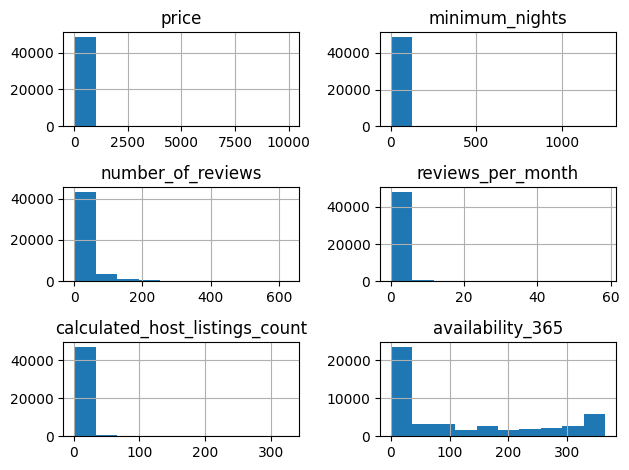

In [120]:
df.hist()
plt.tight_layout()
plt.show()

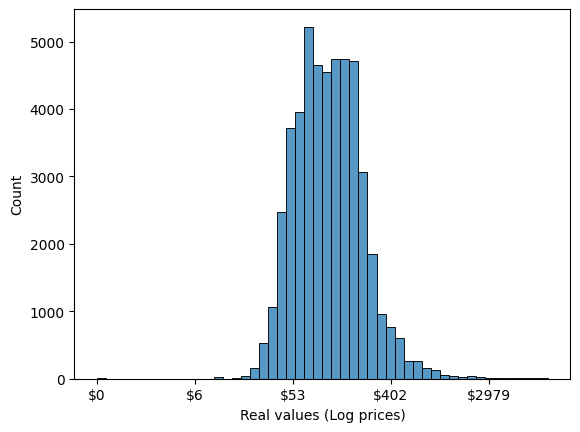

In [121]:
df['price_log'] = np.log1p(df['price'])

ax = sns.histplot(df['price_log'], bins=50)

log_ticks = [0, 2, 4, 6, 8]
values = [np.expm1(x) for x in log_ticks]

ax.set_xticks(log_ticks)
ax.set_xticklabels([f'${int(v)}' for v in values])
plt.xlabel('Real values (Log prices)')
plt.show()

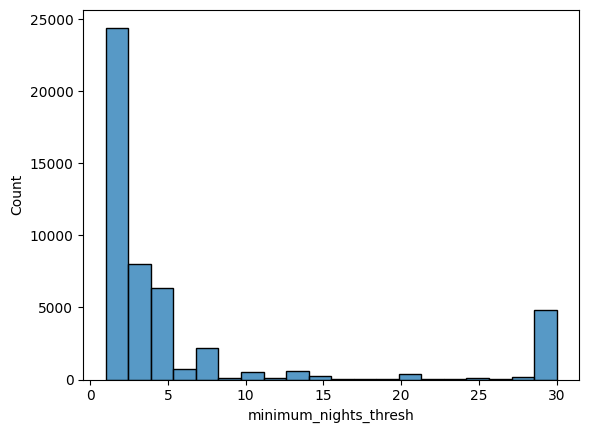

In [122]:
df['minimum_nights_thresh'] = df['minimum_nights'].clip(lower=1, upper=30)

sns.histplot(df['minimum_nights_thresh'], bins=20)
plt.show()

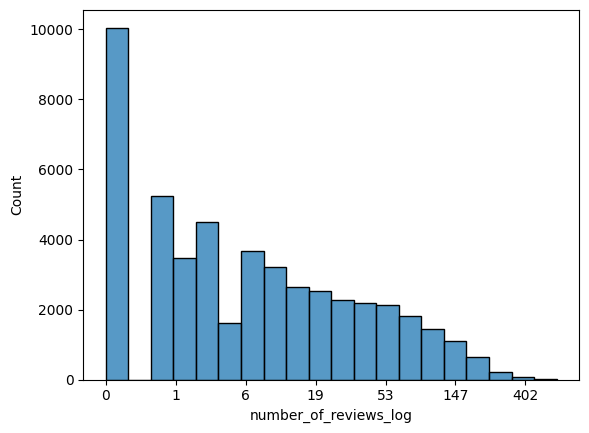

In [123]:
df['number_of_reviews_log'] = np.log1p(df['number_of_reviews'])

log_ticks = [0, 1, 2, 3, 4, 5, 6]
values = [np.expm1(x) for x in log_ticks]

ax = sns.histplot(df['number_of_reviews_log'], bins=20)
ax.set_xticks(log_ticks)
ax.set_xticklabels(f'{int(v)}' for v in values)
plt.show()

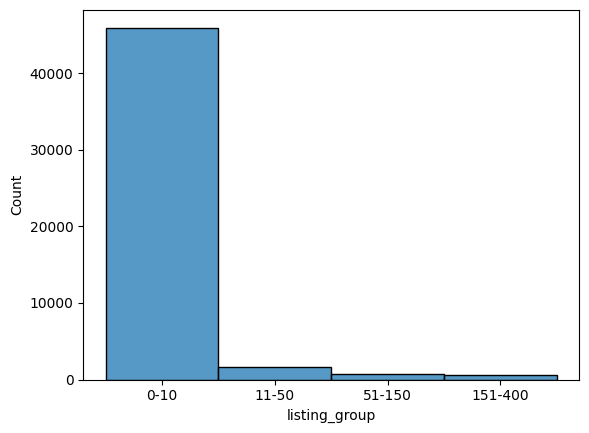

In [124]:
bins = [0, 10, 50, 150, 400]
labels = ['0-10', '11-50', '51-150', '151-400']

df['listing_group'] = pd.cut(df['calculated_host_listings_count'], bins=bins, labels=labels)

sns.histplot(df['listing_group'])
plt.show()

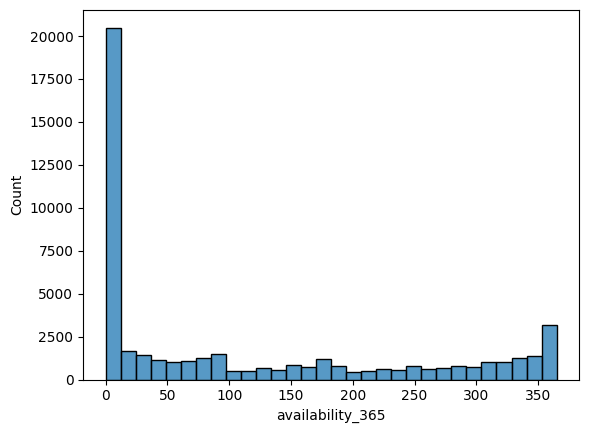

In [125]:
sns.histplot(df['availability_365'])
plt.show()

## Insights on numerical variables
- Most listings fall between 53 and 402 dollars per night. However, there are extreme outliers, with prices reaching up to $10,000, which skews the distribution.
- Almost all listings allow a minimum stay of 1 night, but there is also an aglomeration requiring stays of 30 nights or more. Some listings can go as high as 1250 nights, wich seems unrealistic for Airbnb and likely to be noise. 
- The majority of listings have very few or no reviews at all. The distribution shows a positive skew. 
- Most host manage fewer than 10 listings, but a small number handle over 50 to 300+ listings. 
- Most listings are set to 0 availability days. The distribution between 1 and 365 is relatively flat.

## Categorical Analysis

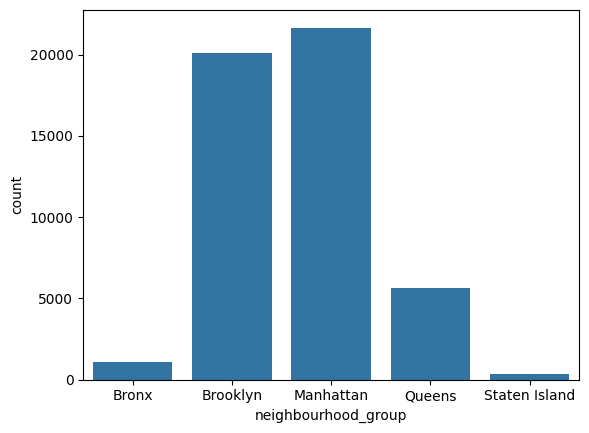

In [126]:
sns.countplot(data=df, x='neighbourhood_group')
plt.show()

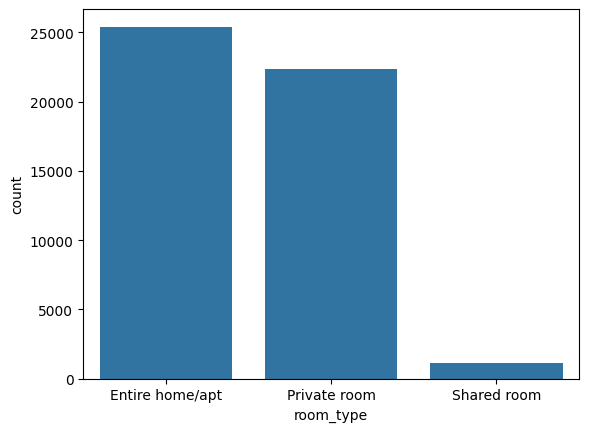

In [127]:
sns.countplot(data=df, x='room_type')
plt.show()

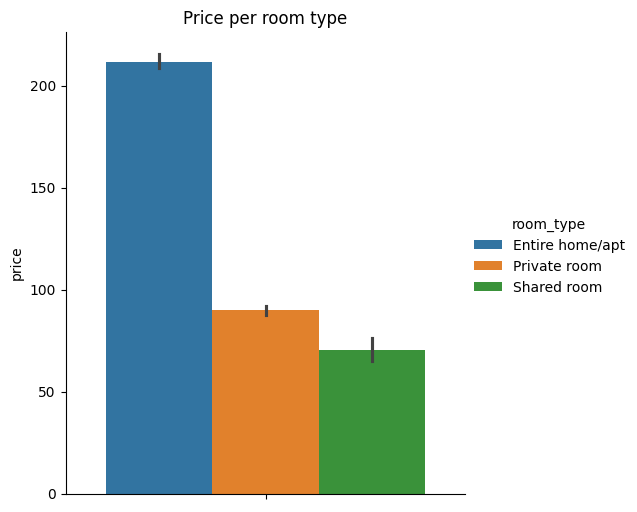

In [128]:
sns.catplot(data=df, y='price', hue='room_type', kind='bar')
plt.title('Price per room type')
plt.show()

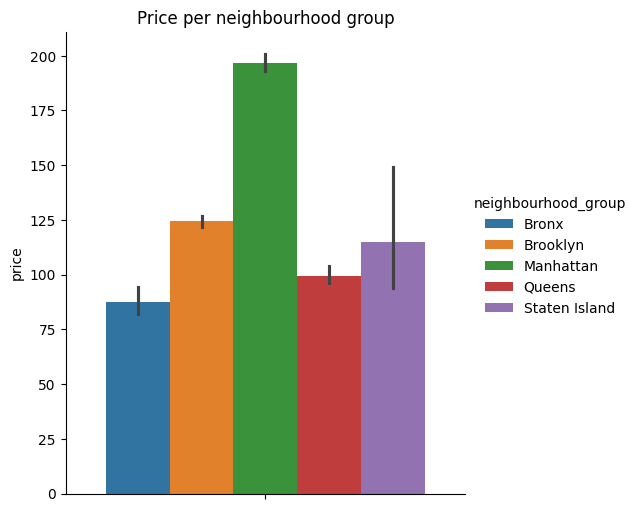

In [129]:
sns.catplot(data=df, y='price', hue='neighbourhood_group', kind='bar')
plt.title('Price per neighbourhood group')
plt.show()

In [130]:
# TOP 5 MOST EXPENSIVE NEIGHBOURHOODS PER GROUP
data = df[df['price'] != 0]

most_expensive = (
    data
    .groupby(['neighbourhood_group', 'neighbourhood'])['price']
    .mean()
    .reset_index()
    .sort_values(by=['neighbourhood_group', 'price'], ascending=[True, False])
    .groupby('neighbourhood_group')
)

cheapest = (
    data
    .groupby(['neighbourhood_group', 'neighbourhood'])['price']
    .mean()
    .reset_index()
    .sort_values(by=['neighbourhood_group', 'price'], ascending=[True, True])
    .groupby('neighbourhood_group')
)

/tmp/ipykernel_2806/1606268647.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['neighbourhood_group', 'neighbourhood'])['price']
/tmp/ipykernel_2806/1606268647.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('neighbourhood_group')
/tmp/ipykernel_2806/1606268647.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['neighbourhood_group', 'neighbourhood'])['price']
/tmp/ipykernel_2806/1

<Figure size 800x400 with 0 Axes>

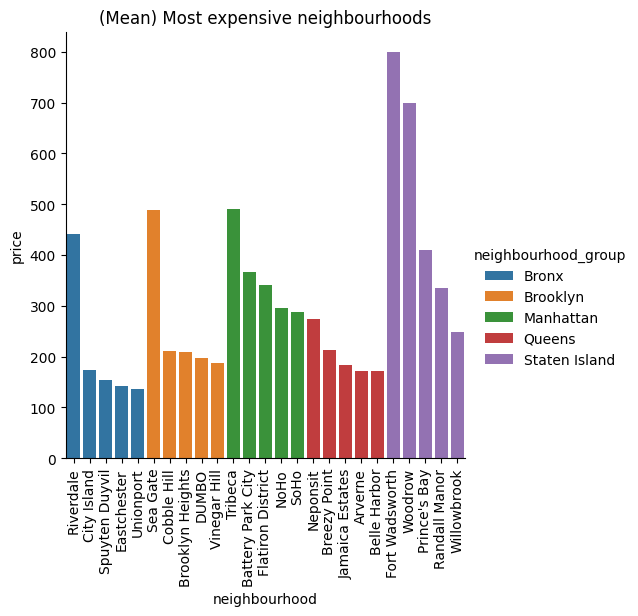

In [131]:
plt.figure(figsize=(8, 4))

sns.catplot(
    data=most_expensive.head(5),
    kind="bar",
    x="neighbourhood",
    y="price",
    hue='neighbourhood_group'
)
plt.xticks(rotation=90)
plt.title('(Mean) Most expensive neighbourhoods')

plt.show()

<Figure size 800x400 with 0 Axes>

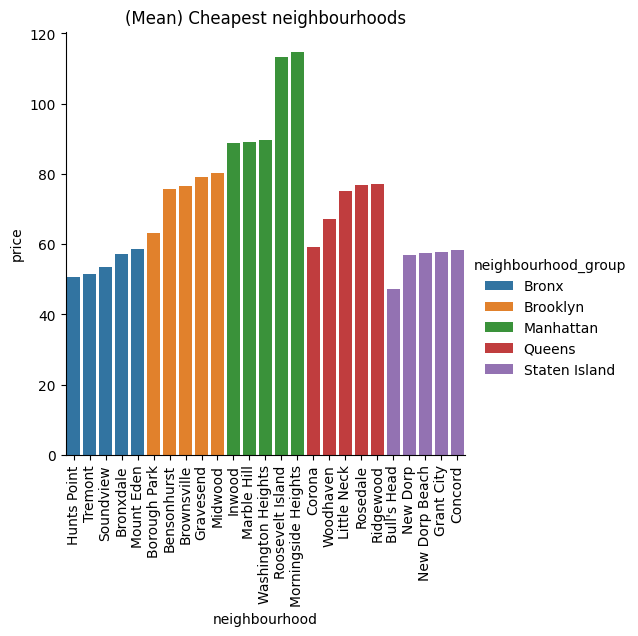

In [132]:
plt.figure(figsize=(8, 4))

sns.catplot(
    data=cheapest.head(5),
    kind="bar",
    x="neighbourhood",
    y="price",
    hue='neighbourhood_group'
)
plt.xticks(rotation=90)
plt.title('(Mean) Cheapest neighbourhoods')

plt.show()

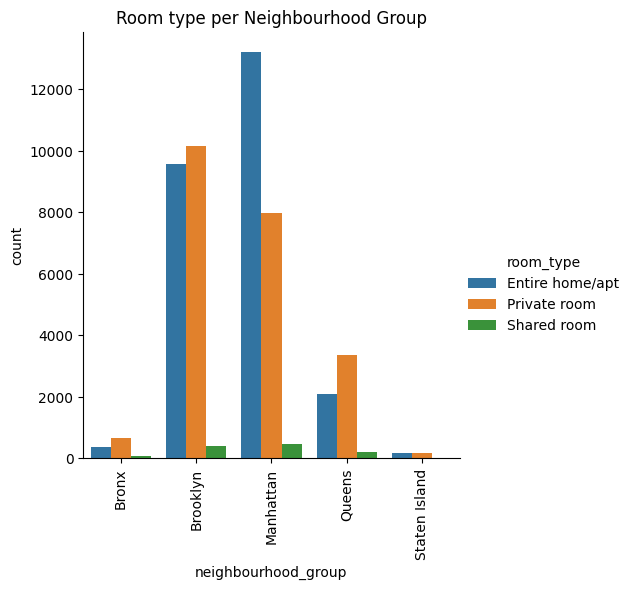

In [133]:
# Analysis
sns.catplot(data=df, 
            x='neighbourhood_group', 
            hue='room_type',
            kind='count')
plt.xticks(rotation=90)
plt.title('Room type per Neighbourhood Group')
plt.show()

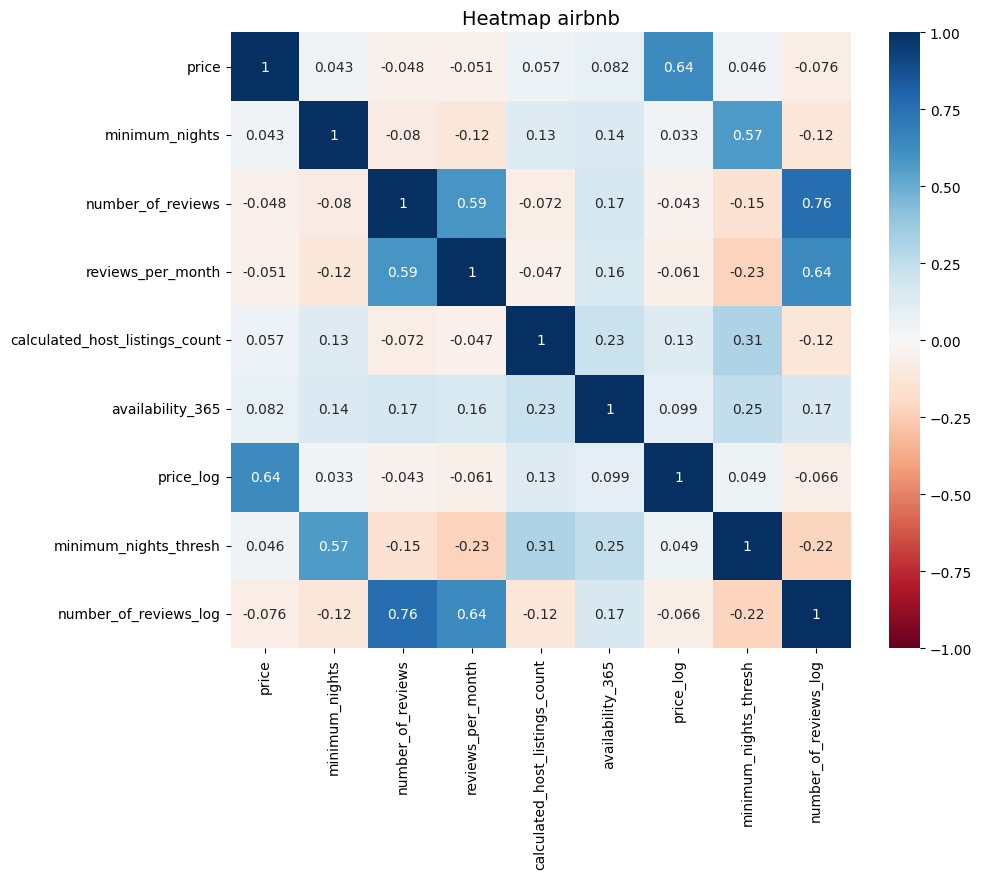

In [134]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.title("Heatmap airbnb", fontsize=14)
plt.show()

## Insights on categorical variables

- Manhattan and Brooklyn are the groups with the highest number of listings in the dataset.

- Staten Island has the lowest number of listings among all areas.

- Entire homes/apartments and private rooms account for the vast majority of room types, while shared rooms are underrepresented.

- Entire homes/apartments are, on average, at least $100 more expensive than private or shared rooms.

- Manhattan appears to be the most expensive neighbourhood group overall, with relatively few outliers. In contrast, Staten Island contains some of the priciest neighbourhoods on average, such as Fort Wadsworth and Woodrow.

- The cheapest neighbourhoods are located in the Bronx and Staten Island.

- In Manhattan, most listings are entire homes/apartments, while in Brooklyn, private rooms are more common.

- The pairplot shows no clear linear relationship between the features, this can be confirmed by the heatmap too.

Based on the insights collected from EDA, the following operations will be performed:

1. Keep only listings with maximum minimum_nights of 30
2. Drop transformation columns
3. The price column is the target vector
4. A pipeline will be created to encode the neighbourhood group and the roomtype
5. The predictors matrix includes: 

- ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listing_count", "availability_365", "neighbourhood_group", "room_type"]

In [135]:
df = df.drop(columns=['price_log', 'minimum_nights_thresh', 'number_of_reviews_log', 'neighbourhood', 'listing_group'])

df = df[df['minimum_nights'] <= 30]

In [136]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [137]:
# Split data
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2025)

X_train.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
33637,Brooklyn,Entire home/apt,3,0,0.00,1,0
40962,Brooklyn,Entire home/apt,3,1,0.21,1,94
2404,Queens,Private room,1,0,0.00,1,0
40139,Manhattan,Shared room,14,1,0.21,28,320
44793,Brooklyn,Private room,7,0,0.00,1,0


In [140]:
# Pipeline
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_proc = Pipeline(steps=[
    ('Onehotencoder', OneHotEncoder(drop='if_binary'))
])

processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols),
    ('cat', cat_proc, cat_cols)
])